In [3]:
pip install yfinance pandas scikit-learn matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 16.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 18.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=b2c3b36836c02a4e15a230c00c763caea79489100bcba796ef745a78263abb03
  Stored in directory: c:\users\tilak\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab6

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


C:\Users\tilak\AppData\Local\Temp\ipykernel_1384\2731258419.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_ticker, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


--- Step 1: Stock Data Loaded Successfully ---
Loaded 1257 days of data for GOOGL
Price            Close
Ticker           GOOGL
Date                  
2024-12-23  193.997528
2024-12-24  195.472717
2024-12-26  194.964371
2024-12-27  192.133591
2024-12-30  190.618561


--- Step 2: Feature Engineering Complete ---
Data with new features:
Price            Close  Prev_Close Day_of_Year
Ticker           GOOGL                        
Date                                          
2024-12-23  193.997528  190.787994         358
2024-12-24  195.472717  193.997528         359
2024-12-26  194.964371  195.472717         361
2024-12-27  192.133591  194.964371         362
2024-12-30  190.618561  192.133591         365


--- Data Split Complete ---
Training set size: 1156
Testing set size: 100

--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
Root Mean Squared Error (RMSE): $2.97

Forecast plot saved as 'stock_price_forecast.png'

--- Analysis Complete ---


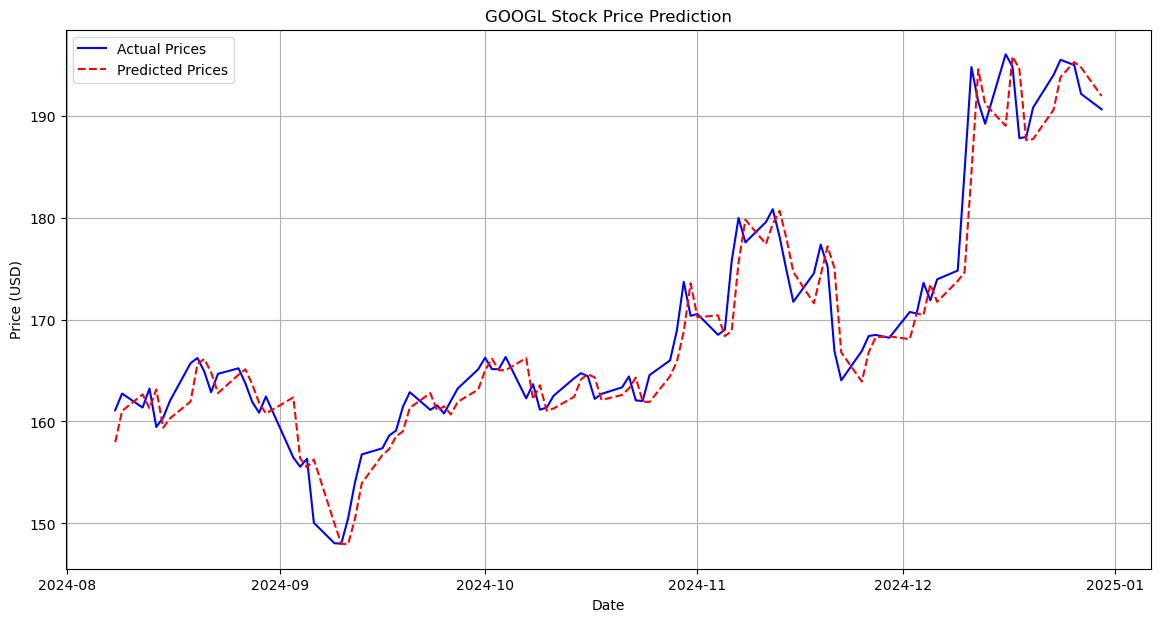

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

try:
    # --- Step 1: Load the Data ---
    # Fetch historical data for Google (GOOGL) from 2020 to 2024
    stock_ticker = 'GOOGL'
    df = yf.download(stock_ticker, start='2020-01-01', end='2024-12-31')
    
    # We will use the 'Close' price for our prediction
    df = df[['Close']].copy()
    
    print("--- Step 1: Stock Data Loaded Successfully ---")
    print(f"Loaded {df.shape[0]} days of data for {stock_ticker}")
    print(df.tail())
    print("\n")

    # --- Step 2: Feature Engineering ---
    # Create features to help the model predict the next day's price.
    # 1. Lag Feature: Use the previous day's price as a feature.
    df['Prev_Close'] = df['Close'].shift(1)
    
    # 2. Time Feature: Use the day of the year as a feature.
    df['Day_of_Year'] = df.index.dayofyear

    # Drop the first row which has a NaN value due to the shift operation
    df.dropna(inplace=True)
    
    print("--- Step 2: Feature Engineering Complete ---")
    print("Data with new features:")
    print(df.tail())
    print("\n")

    # --- Step 3: Train the Model ---
    # Define features (X) and target (y)
    X = df[['Prev_Close', 'Day_of_Year']]
    y = df['Close']
    
    # Split the data chronologically for time series forecasting
    # We'll use the last 100 days for testing
    split_index = len(X) - 100
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    print("--- Data Split Complete ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}\n")
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("--- Step 4: Model Evaluation ---")
    print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
    
    # Visualize the predictions vs. actual prices
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
    plt.title(f'{stock_ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig('stock_price_forecast.png')
    print("\nForecast plot saved as 'stock_price_forecast.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")